In [1]:
###  Import modules

import numpy as np
# import scipy.io as sio
import matplotlib.pyplot as plt
import pysindy as ps



In [2]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [3]:
#%% Set filename and pathname


Re = 50

t_trm_1 = 25000
t_trm_2 = 50000

# t_trm_1 = 24750
# t_trm_2 = 49750

# # t_trm_1 = 30000
# # t_trm_2 = 47500



# Re = 62

# # # t_trm_1 = 0
# # # t_trm_2 = -1

# # t_trm_1 = 0
# # t_trm_2 = 20000

# t_trm_1 = 7500
# t_trm_2 = 22500



# Re = 75

# # t_trm_1 = 0
# # t_trm_2 = -1

# t_trm_1 = 5000
# t_trm_2 = 17500



# Re = 87

# # t_trm_1 = 0
# # t_trm_2 = -1


# # t_trm_1 = 0
# # t_trm_2 = 10000


# t_trm_1 = 2500
# t_trm_2 = 15000



# Re = 100
# t_trm_1 = 4000
# t_trm_2 = 12000




In [4]:
###  SINDY Parameters

threshold              = 0.0

differentiation_method = ps.FiniteDifference(order=2)
feature_library        = ps.PolynomialLibrary(degree=3)
optimizer              = ps.STLSQ(threshold=threshold)


###  Other parameters

should_normalize = True



In [5]:
###  

In [6]:
###  Set loading strings

stem = '/Users/josephwilliams/Documents/Data_Results/Coarse-Grained-Vortex-Shedding/Vortex Shedding Data/Coefficients of Lift, Drag/'
filename = stem + 'Re' + str(Re) + '/ibpm.force'



In [7]:
###  Load data

data = np.genfromtxt(filename, dtype="f8", delimiter=" ")
t =   data[t_trm_1 : t_trm_2, 1]
C_l = data[t_trm_1 : t_trm_2, 3]
C_d = data[t_trm_1 : t_trm_2, 2]

# adjust t
t = t-t[0]

# normalize
if should_normalize == True: C_l = C_l / np.max(np.abs(C_l))

# Derived quantites
dt = t[1]-t[0]


###  Differentiate the data

C_l_dt = ps.FiniteDifference(axis=0)._differentiate(C_l, dt)
C_d_dt = ps.FiniteDifference(axis=0)._differentiate(C_d, dt)



In [8]:
###  

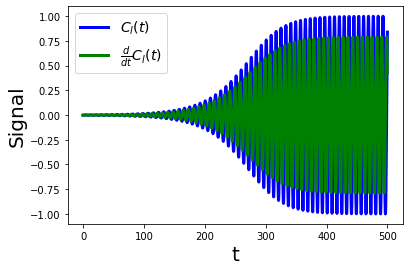

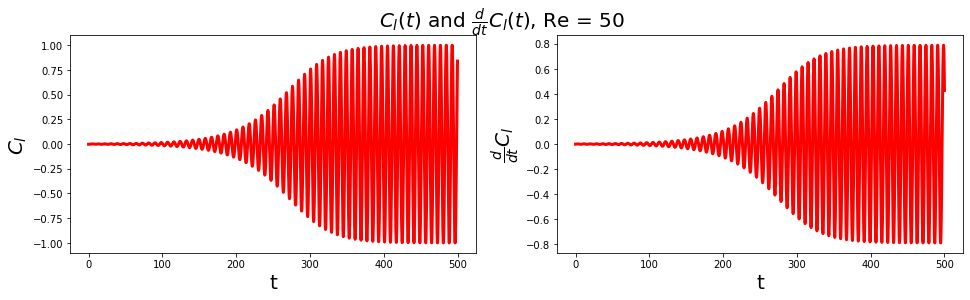

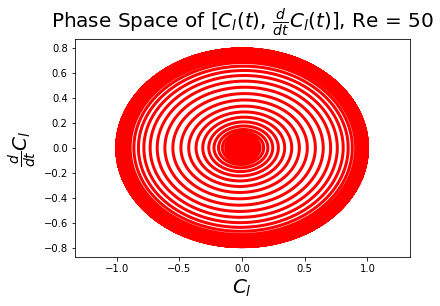

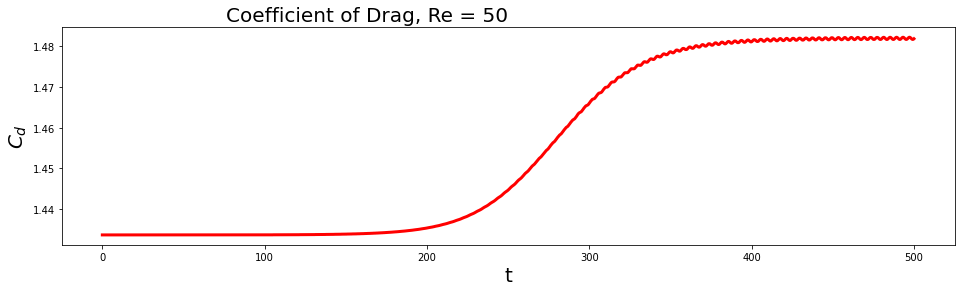

In [9]:
###  Plot the data


# Both on 1 plot
plt.figure()
plt.plot(t, C_l,  linewidth=3, color='b' , label='$C_l(t)$' ) # 
plt.plot(t, C_l_dt,  linewidth=3, color='g' , label=r'$\frac{d}{dt} C_l(t)$' ) # 
plt.xlabel('t', fontsize=20)
plt.ylabel('Signal', fontsize=20)
plt.legend(fontsize=14)
plt.show()


# 2 Separate plots 
plt.figure(figsize=(16, 4))
ttl_str = r'$C_l(t)$ and $\frac{d}{dt} C_l(t)$, Re = ' + str(Re)
plt.suptitle(ttl_str, fontsize=20, horizontalalignment='center')

plt.subplot(1, 2, 1)
plt.plot(t, C_l,  linewidth=3, color='r') # 
plt.xlabel('t', fontsize=20)
plt.ylabel('$C_l$', fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(t, C_l_dt,  linewidth=3, color='r') # 
plt.xlabel('t', fontsize=20)
plt.ylabel(r'$\frac{d}{dt} C_l$', fontsize=20)

plt.show()


# Phase space
plt.figure()
plt.plot(C_l, C_l_dt,  linewidth=3, color='r') # 
plt.xlabel(r'$C_l$', fontsize=20)
plt.ylabel(r'$\frac{d}{dt} C_l$', fontsize=20)
ttl_str = r'Phase Space of [$C_l(t)$, $\frac{d}{dt} C_l(t)$], Re = ' + str(Re)
plt.title(ttl_str, fontsize=20)
plt.axis('equal')
plt.show()


# Drag
plt.figure(figsize=(16, 4))
plt.plot(t, C_d,  linewidth=3, color='r')
plt.xlabel('t', fontsize=20)
plt.ylabel('$C_d$', fontsize=20)
ttl_str = 'Coefficient of Drag, Re = ' + str(Re)
plt.title(ttl_str, fontsize=20, horizontalalignment='right')
plt.show()



In [10]:
###  

In [11]:
# Compare amplitudes of the two signals


print('')
print('Max of      C_l = ' + str(np.max(C_l)) )
print('Max of d/dt C_l = ' + str(np.max(C_l_dt)) )
print('\n')




Max of      C_l = 0.99997282051073
Max of d/dt C_l = 0.7886543298972042




In [12]:
###  

In [13]:
###  Initiate and run SINDy


feature_names = ["x", "y"]

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=feature_names,)



X = np.asarray([C_l, C_l_dt]).T
model.fit(X, t=t)
t_SS = t


# subSamp_rate = 5
# X = np.asarray([C_l[::subSamp_rate], C_l_dt[::subSamp_rate]]).T
# t_SS = t[::subSamp_rate]
# model.fit(X, t=t_SS)




print('')
print('x =      C_l')
print('y = d/dt C_l')
print('\n')
model.print(precision=4)
print('\n')
model.print(precision=10)
print('\n')




x =      C_l
y = d/dt C_l


(x)' = 1.0000 y
(y)' = -0.5570 x + 0.0408 y + -0.0661 x^3 + -0.0412 x^2 y + -0.1050 x y^2 + -0.0659 y^3


(x)' = 1.0000000000 y
(y)' = 0.0000038386 1 + -0.5569896080 x + 0.0408319587 y + -0.0000069077 x^2 + 0.0000113537 x y + 0.0000073601 y^2 + -0.0660772892 x^3 + -0.0411758160 x^2 y + -0.1050431688 x y^2 + -0.0658771942 y^3




In [14]:
###  Generate SINDy fit and numerical solution


# Numerical solution
X0 = X[0,:]
x_test_sim = model.simulate(X0, t_SS, integrator_kws={'atol': 1e-6, 'method': 'RK45', 'rtol': 1e-6})
error    = X[:,0] - x_test_sim[:,0]
error_dt = X[:,1] - x_test_sim[:,1]

NMSE    = np.sqrt( np.sum(error**2)    / np.sum(C_l**2)    )
NMSE_dt = np.sqrt( np.sum(error_dt**2) / np.sum(C_l_dt**2) )



In [15]:
np.sqrt( NMSE**2 + NMSE_dt**2 ) 

1.811150062339529

In [16]:
###  

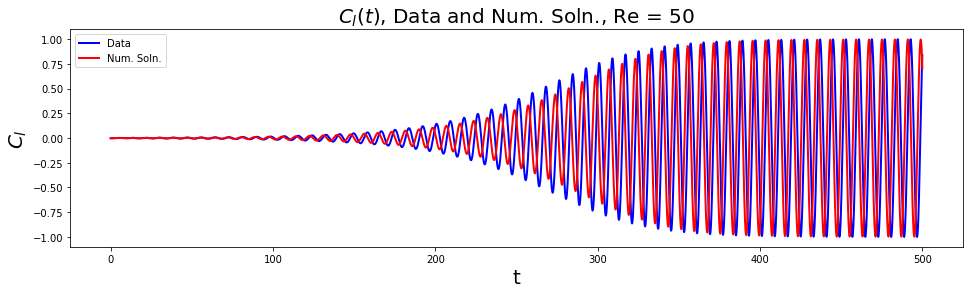

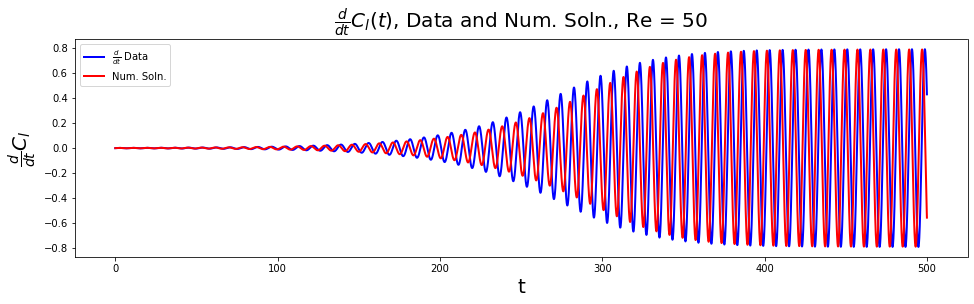

In [17]:
###  Plot the results – numerical solution


plt.figure(figsize=(16, 4))
plt.plot(t, C_l,  linewidth=2, color='b', label='Data') # 
plt.plot(t_SS, x_test_sim[:,0],  linewidth=2, color='r', label='Num. Soln.') # 
plt.xlabel('t', fontsize=20)
plt.ylabel('$C_l$', fontsize=20)
ttl_str = '$C_l(t)$, Data and Num. Soln., Re = ' + str(Re)
plt.title(ttl_str, fontsize=20)
plt.legend()
plt.show()


plt.figure(figsize=(16, 4))
plt.plot(t, C_l_dt,  linewidth=2, color='b', label=r'$\frac{d}{dt}$ Data') # 
plt.plot(t_SS, x_test_sim[:,1],  linewidth=2, color='r', label='Num. Soln.') # 
plt.xlabel('t', fontsize=20)
plt.ylabel(r'$\frac{d}{dt} C_l$', fontsize=20)
ttl_str = r'$\frac{d}{dt}C_l(t)$, Data and Num. Soln., Re = ' + str(Re)
plt.title(ttl_str, fontsize=20)
plt.legend()
plt.show()



In [18]:
### 

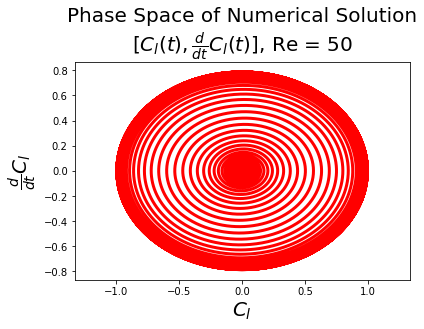

In [19]:
###  Phase space

plt.figure()
plt.plot(x_test_sim[:,0], x_test_sim[:,1],  linewidth=3, color='r') # 
plt.xlabel(r'$C_l$', fontsize=20)
plt.ylabel(r'$\frac{d}{dt} C_l$', fontsize=20)
ttl_str = 'Phase Space of Numerical Solution\n'+r'$[C_l(t),\frac{d}{dt}C_l(t)]$, Re = ' + str(Re)
plt.title(ttl_str, fontsize=20)
plt.axis('equal')
plt.show()



In [20]:
###  

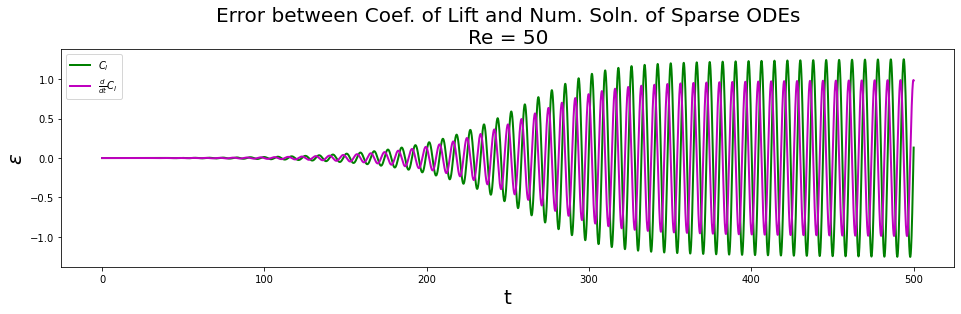


Max error on x_1 = 1.2526993380911486
Max error on x_2 = 0.9893025699910953


NMSE on x_1 = 1.2838185597946183
NMSE on x_2 = 1.2775266939830854




In [21]:
###  Plot error

plt.figure(figsize=(16, 4))
plt.plot(t_SS, error,  linewidth=2, color='g', label=r'$C_l$') # 
plt.plot(t_SS, error_dt,  linewidth=2, color='m', label=r'$\frac{d}{dt}C_l$') # 
plt.xlabel('t', fontsize=20)
plt.ylabel('$\epsilon$', fontsize=20)
ttl_str = 'Error between Coef. of Lift and Num. Soln. of Sparse ODEs' + '\nRe = ' + str(Re)
plt.title(ttl_str, fontsize=20)
plt.legend()
plt.show()


print('')
print('Max error on x_1 = ' + str(np.max(error)))
print('Max error on x_2 = ' + str(np.max(error_dt)))
print('\n')
print('NMSE on x_1 = ' + str(NMSE))

print('NMSE on x_2 = ' + str(NMSE_dt))
print('\n')

